In [ ]:
# 1. Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [9]:
# 2. Load MNIST dataset (70,000 images)
print("Downloading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
#as_frame=False : Loads the data as a NumPy array, not a Pandas DataFrame (faster for ML).


c:\Users\anjal\anaconda3\envs\Anjali\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
print("X shape:", X.shape) 
#70000 → total images (60,000 training + 10,000 testing in standard MNIST split).
#784 → flattened pixels.

X shape: (70000, 784)


In [11]:
image = X[0].reshape(28, 28)
print(image.shape)

(28, 28)


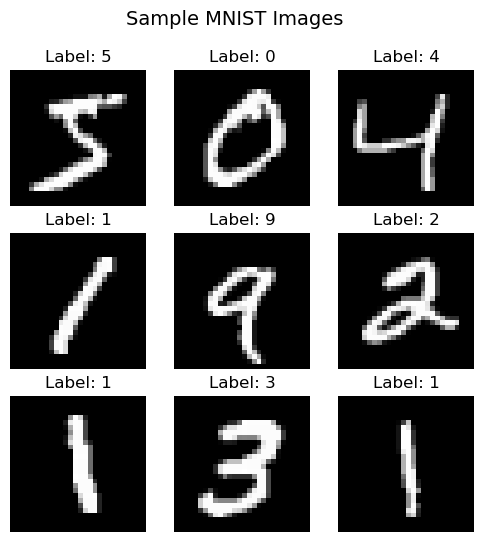

In [12]:
plt.figure(figsize=(6, 6))
for i in range(9):
    img = X[i].reshape(28, 28)  # Reshape 784 pixels to 28x28
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Images", fontsize=14)
plt.show()

In [13]:
# Normalize pixel values (0-255 → 0-1 range)
X = X / 255.0



In [14]:
# 3. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
# 4. Train Gaussian Naive Bayes model
print("Training Gaussian Naive Bayes...")
model = MultinomialNB()
model.fit(X_train, y_train)



Training Gaussian Naive Bayes...


MultinomialNB()

In [26]:
# 5. Predict on test data
y_pred = model.predict(X_test)



In [27]:
# 6. Evaluate performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8280714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91      1343
           1       0.87      0.94      0.90      1600
           2       0.88      0.82      0.85      1380
           3       0.80      0.82      0.81      1433
           4       0.83      0.74      0.78      1295
           5       0.86      0.67      0.75      1273
           6       0.88      0.91      0.89      1396
           7       0.94      0.83      0.88      1503
           8       0.67      0.78      0.72      1357
           9       0.70      0.84      0.76      1420

    accuracy                           0.83     14000
   macro avg       0.83      0.82      0.83     14000
weighted avg       0.84      0.83      0.83     14000


Confusion Matrix:
 [[1215    1    8    4    2   21   29    1   60    2]
 [   0 1498    6   13    1   10    5    1   63    3]
 [  13   25 1135   31   18    4   62   10   78    4]
 [   4 

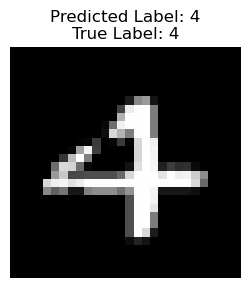

In [19]:
# ✅ 7. Predict a single test sample and show it
sample_index = 9  # change this index to see different test samples
sample_image = X_test[sample_index].reshape(28, 28)
predicted_label = model.predict([X_test[sample_index]])[0]

plt.figure(figsize=(3, 3))
plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}\nTrue Label: {y_test[sample_index]}")
plt.axis('off')
plt.show()

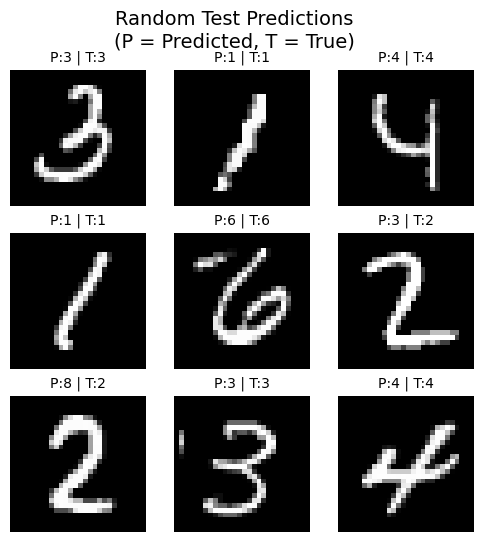

In [20]:
# ✅ 7. Predict 9 random test samples
indices = np.random.choice(len(X_test), 9, replace=False)

plt.figure(figsize=(6, 6))
for i, idx in enumerate(indices):
    img = X_test[idx].reshape(28, 28)
    pred_label = model.predict([X_test[idx]])[0]
    true_label = y_test[idx]
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"P:{pred_label} | T:{true_label}", fontsize=10)
    plt.axis('off')

plt.suptitle("Random Test Predictions\n(P = Predicted, T = True)", fontsize=14)
plt.show()

In [30]:
import cv2
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# ✅ 1. Train Gaussian Naive Bayes on MNIST
print("Training model... (This may take some time)")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # Normalize

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)
print("Model trained. Test Accuracy:", accuracy_score(y_test, model.predict(X_test)))



Training model... (This may take some time)


c:\Users\anjal\anaconda3\envs\Anjali\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Model trained. Test Accuracy: 0.8280714285714286


In [35]:
# ✅ 2. Create whiteboard window for drawing
canvas = np.ones((300, 300), dtype=np.uint8) * 255  # White background
drawing = False
last_point = None

def draw(event, x, y, flags, param):
    global drawing, last_point
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        last_point = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        cv2.line(canvas, last_point, (x, y), (0,), 15)  # Draw thick black line
        last_point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.namedWindow("Whiteboard")
cv2.setMouseCallback("Whiteboard", draw)

print("\nInstructions:")
print("✏ Draw your digit with the mouse")
print("✅ Press 'p' to predict")
print("🧹 Press 'c' to clear")
print("❌ Press 'q' to quit")

while True:
    cv2.imshow("Whiteboard", canvas)
    key = cv2.waitKey(1) & 0xFF

    if key == ord('p'):  # Predict
        # Preprocess: resize to 28x28 and invert colors
        img_resized = cv2.resize(canvas, (28, 28))
        img_inverted = cv2.bitwise_not(img_resized)  # Black digit on white background
        img_normalized = img_inverted / 255.0
        img_flattened = img_normalized.reshape(1, -1)

        prediction = model.predict(img_flattened)[0]
        print(f"✅ Predicted Digit: {prediction}")

        # Show predicted image
        cv2.imshow("Prediction (28x28)", img_inverted)

    elif key == ord('c'):  # Clear canvas
        canvas[:] = 255

    elif key == ord('q'):  # Quit
        break

cv2.destroyAllWindows()



Instructions:
✏ Draw your digit with the mouse
✅ Press 'p' to predict
🧹 Press 'c' to clear
❌ Press 'q' to quit
✅ Predicted Digit: 6
